<img src ='https://th.bing.com/th/id/OIP.PMs3Q6BPCDKKjSO05bUzygHaEK?pid=ImgDet&rs=1'>

# 🧠  Clustering Algorithms Explored:

- Clustering algorithms are unsupervised machine learning algorithms so there is no label associated with data points. 
- This technique  involves grouping similar data points together into clusters based on certain characteristics. 
- The goal of clustering is to discover inherent patterns or structures in the data without any predefined labels.

## K-means Clustering:🎭🧮📚
K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

Here's how K-means clustering works:

<img src="Kmeans.jpeg" alt="" width="600" height="600">

>##### 1. Initialization: - 
Choose the number of clusters K.
Randomly initialize K cluster centers (centroids) in the feature space.
> ##### 2. Assignment Step:
For each data point, calculate its distance to each cluster center.
Assign the data point to the cluster with the nearest center.
> ##### 3. Update Step:
Recalculate the cluster centers by taking the mean of all data points assigned to that cluster.
> ##### 4. Repeat Assignment and Update:
Iteratively repeat the assignment and update steps until convergence or a maximum number of iterations.

K-means tries to minimize the within-cluster sum of squared (wcss) distances, which means that it aims to create clusters where the data points are close to the center of their own cluster.

### Limitations of K-means Clustering:
- Sensitive to Initial Conditions: Different initializations might lead to different results.
- Number of Clusters: The number of clusters (K) must be specified in advance.
- Assumption of Spherical Clusters: K-means assumes that clusters are spherical and equally sized, which might not be true for all datasets.
- Outliers: K-means is sensitive to outliers as they can significantly affect cluster centroids.

# ▨ Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# ▨ Loading Dataset

In [2]:
dataset = 'Bank-data.csv'
df = pd.read_csv(dataset)
df.head()

Index  interest_rate  credit  Gender  previous  duration Churn
0      0          1.334       0       1         0       117    no
1      1          0.767       0       0         1       274   yes
2      2          4.858       0       1         0       167    no
3      3          4.120       0       0         0       686   yes
4      4          4.856       0       1         0       159    no

In [3]:
df.drop('Index', axis=1, inplace=True)

# ▨ Data Cleaning

In [4]:
# Remove duplicates

def drop_dup(df):
    if df.duplicated().any() == True:
        print('The total duplicate row before removing duplicate:', df.duplicated().sum())
        df.drop_duplicates(inplace=True , keep = 'last')  # Remove duplicates
        df = df.reset_index(drop=True) #Reset the index
        print('The total duplicate row after removing duplicate:', df.duplicated().sum(), ' \nshape of dataset after removing duplicate columns :',df.shape)
    else:
        return 'No duplicate entries'
drop_dup(df)

The total duplicate row before removing duplicate: 5
The total duplicate row after removing duplicate: 0  
shape of dataset after removing duplicate columns : (513, 6)


# ▨ Exploring Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 0 to 517
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   interest_rate  513 non-null    float64
 1   credit         513 non-null    int64  
 2   Gender         513 non-null    int64  
 3   previous       513 non-null    int64  
 4   duration       513 non-null    int64  
 5   Churn          513 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 28.1+ KB


##### - The dataset consists of 517 rows and 6 columns.
##### - There are no missing values present in the dataset.
##### - The `Churn` column is object type , while the other columns contain numeric data.


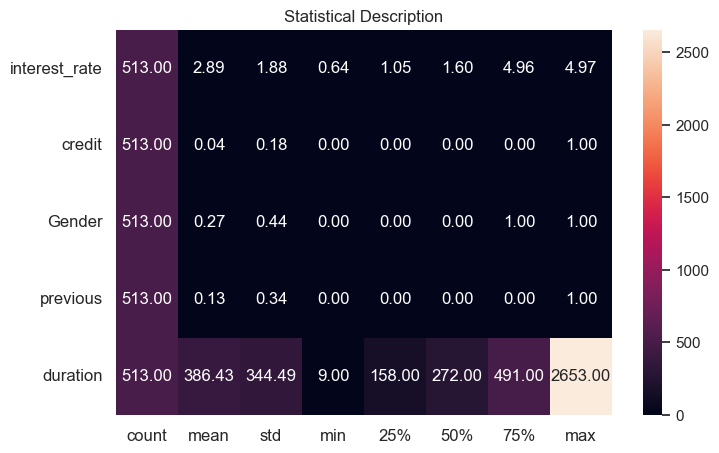

In [6]:
desc=df.describe().T
def descriptive_stats(df):


    plt.figure(figsize=(8,5))
    sns.heatmap(df, annot=True, cmap='rocket', fmt=".2f")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.title('Statistical Description')
    plt.show()


descriptive_stats(desc)

# ▨ Exploratory Data Analysis (EDA)

                     Total no. of Unique Values
credit             2
Gender             2
previous           2
Churn              2
interest_rate    147
duration         386
dtype: int64


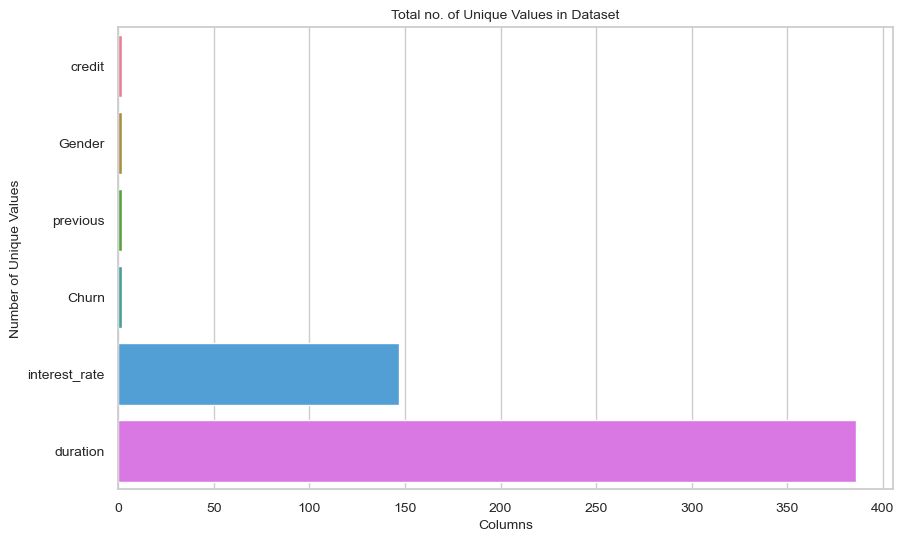

In [7]:
# Count the number of unique values in each column
def check_unquie_count(df):
    unique_counts = df.nunique().sort_values()
    print('=='*30)
    print('  '*10, 'Total no. of Unique Values')
    print('=='*30)
    print(unique_counts)
    print('=='*30)
# Create a bar plot or count plot of unique values
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.barplot(y=unique_counts.index, x=unique_counts.sort_values(),palette='husl' )

    plt.xticks(rotation=0, fontsize= 10)
    plt.yticks( fontsize= 10 )
    plt.xlabel('Columns',fontsize=10)
    plt.ylabel('Number of Unique Values', fontsize=10)
    plt.title('Total no. of Unique Values in Dataset', fontsize=10)

# Display the plot
    plt.show()

check_unquie_count(df)

In [8]:
from pandas_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

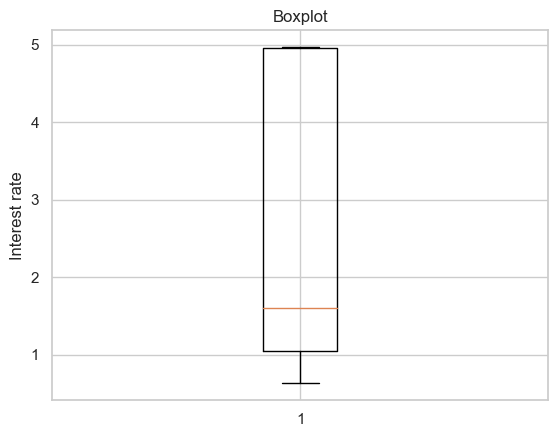

In [9]:
sns.set_style("whitegrid")
plt.boxplot(df.interest_rate)
plt.ylabel('Interest rate')
plt.title('Boxplot')
plt.show()

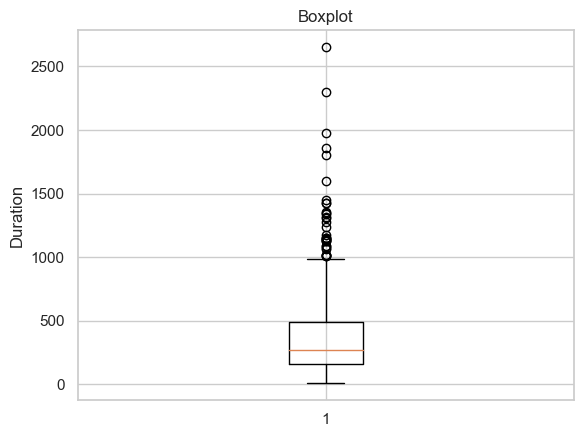

In [10]:
plt.boxplot(df.duration)
plt.ylabel('Duration')
plt.title('Boxplot')
plt.show()

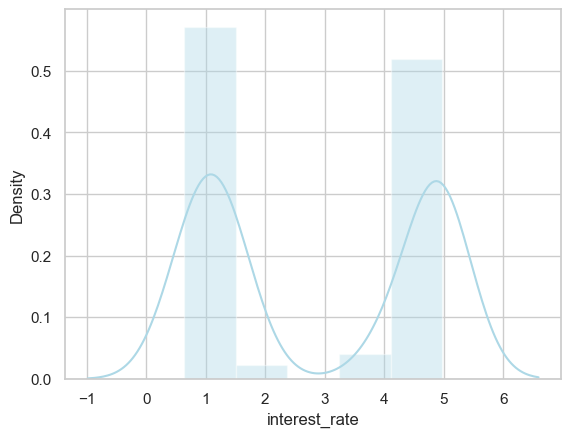

In [11]:
#plt.hist(x["interest_rate"])   #Univariate

sns.distplot(df.interest_rate, color="lightblue",  );

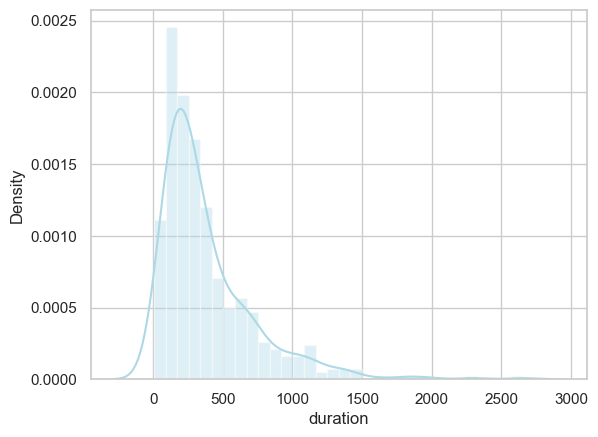

In [12]:
#plt.hist(x["duration"])
sns.distplot(df.duration, color="lightblue");

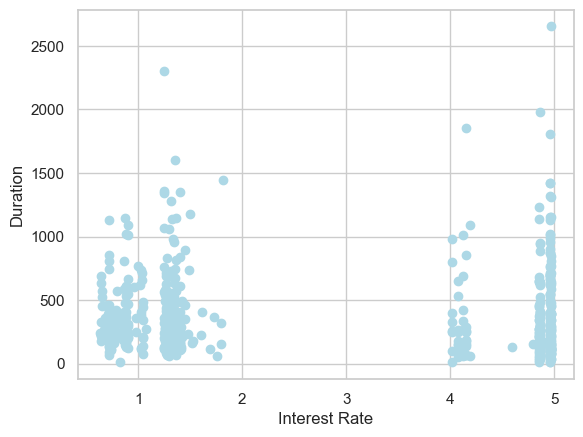

In [13]:
plt.scatter(df["interest_rate"], df["duration"], c ='lightblue' )
plt.xlabel('Interest Rate')
plt.ylabel('Duration')
plt.show()

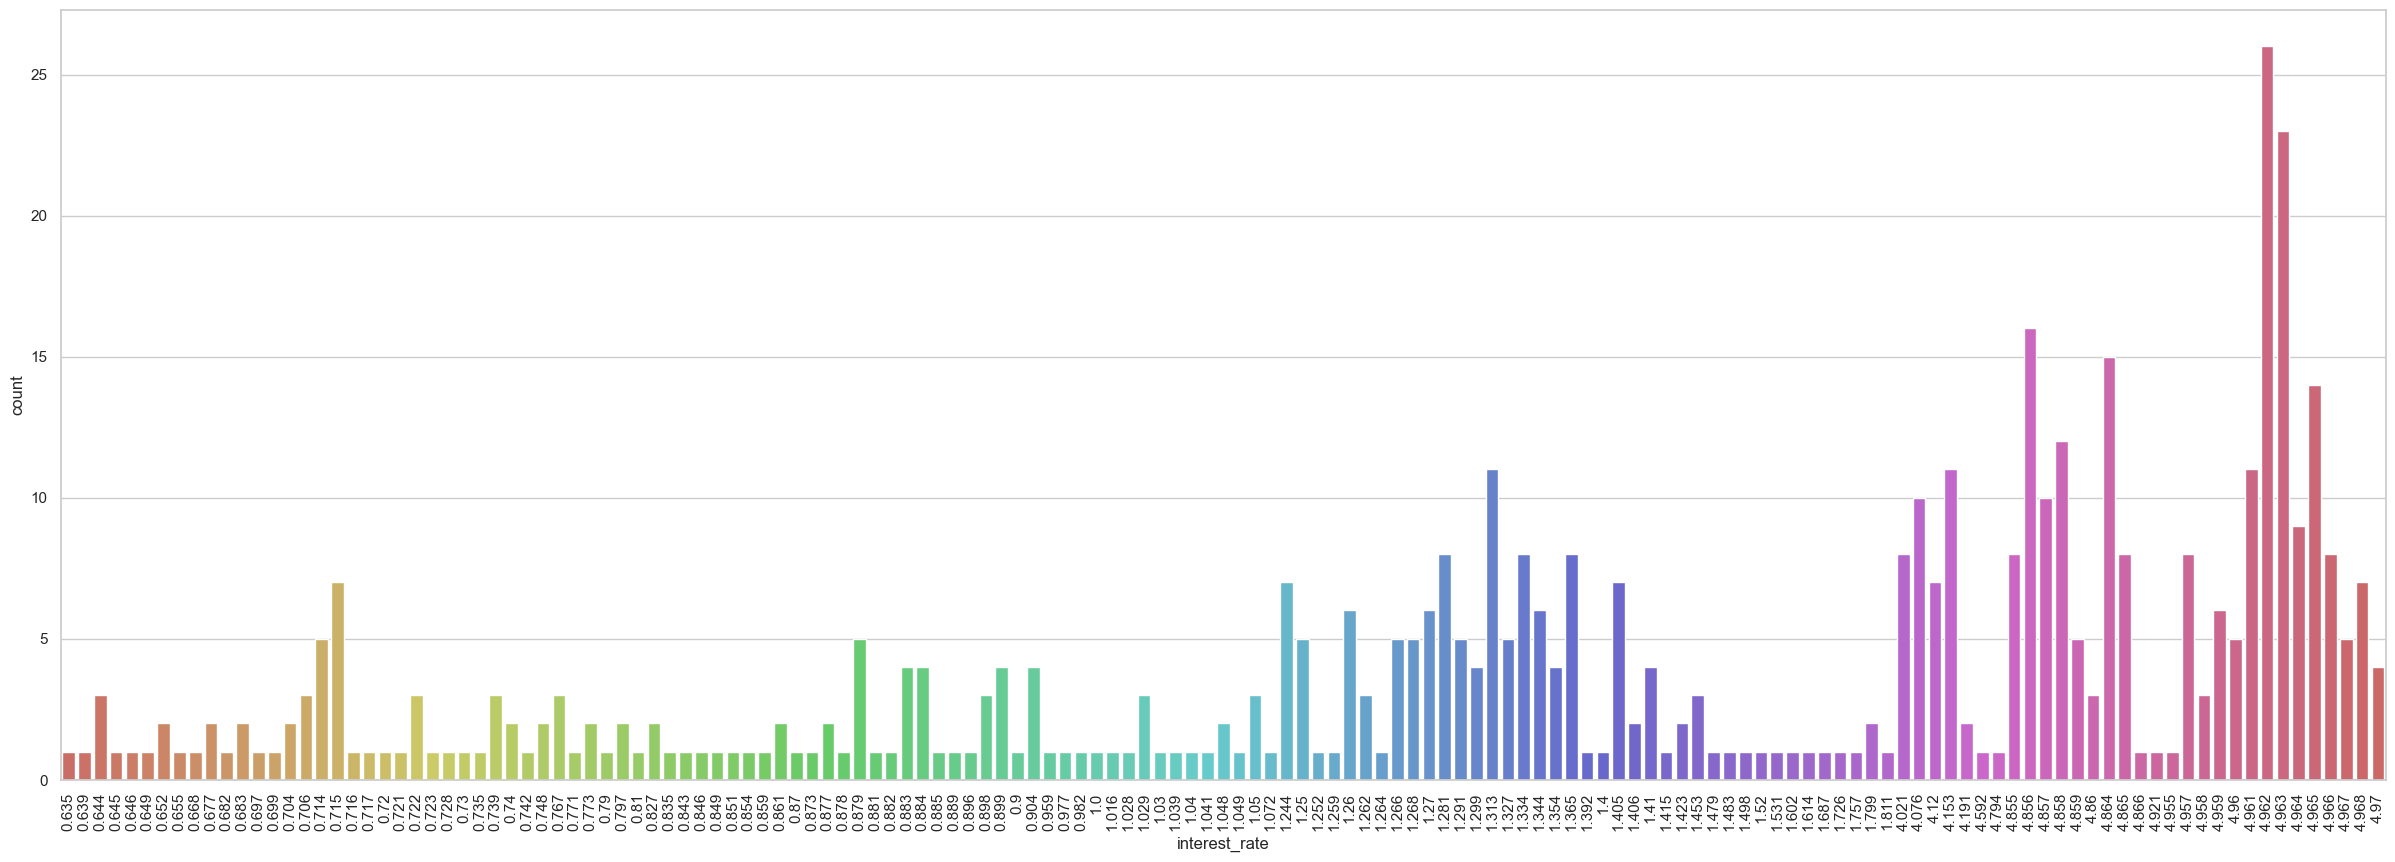

In [14]:
plt.figure(figsize=(30, 10))
sns.countplot(x="interest_rate", data=df, palette='hls',)
plt.xticks(rotation=90) 
plt.show()

# ▨ Finding Correlation

<Axes: >

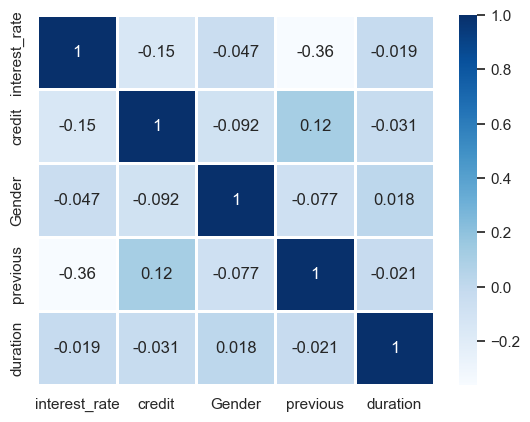

In [15]:
sns.heatmap(df.select_dtypes(include ='number').corr(), annot=True,linewidth=.8, cmap="Blues")

# ▨ Importing libraries for Model Building and Evaluation

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


## Encoding `Churn` variable

In [17]:
df['Churn'] = df['Churn'].astype('category').cat.codes

#  ▨ Modeling with 2 features : `interest_rate`,`duration`

In [18]:
x2_train = df.loc[:, ['interest_rate','duration']].values


In [19]:
sc = StandardScaler()
sc_x2 = sc.fit_transform(x2_train)

## Inertia Calculation  (Using Elbow Method):

Inertia is within cluster sum of squares criteron (calculating error-  sum square distance(Euclidean distance) between the centroid and each point). It is metric shows how internally coherent the clusters are. Inertia assumes the cluster

In [20]:
# Elbow method : To find optimum number of clusters required for modeling
error = []  
k = list(range(3, 15))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(sc_x2)
    error.append(kmeans.inertia_)
    print(f'For n_clusters = {i}, the intertia is {kmeans.inertia_}' )


For n_clusters = 3, the intertia is 256.74571135356257
For n_clusters = 4, the intertia is 186.6160703941797
For n_clusters = 5, the intertia is 123.9285104929349
For n_clusters = 6, the intertia is 95.04326539845401
For n_clusters = 7, the intertia is 71.11739147621033
For n_clusters = 8, the intertia is 58.8400818768117
For n_clusters = 9, the intertia is 47.56772709171158
For n_clusters = 10, the intertia is 43.14045943905836
For n_clusters = 11, the intertia is 38.894387878157225
For n_clusters = 12, the intertia is 35.69839096427495
For n_clusters = 13, the intertia is 31.98454164431077
For n_clusters = 14, the intertia is 28.688022310816052


Text(0.5, 1.0, 'Elbow Method for  determininig optimal value of k')

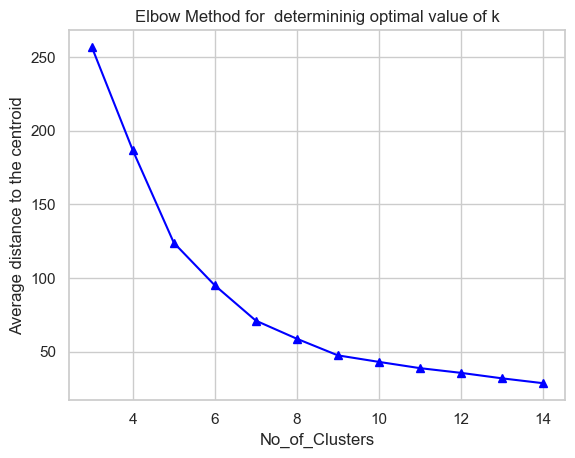

In [21]:
plt.plot(k, error,  color= 'blue', marker='^')
plt.xlabel("No_of_Clusters")
plt.ylabel("Average distance to the centroid")
plt.title('Elbow Method for  determininig optimal value of k')

In [22]:
km5 = KMeans(n_clusters = 5)
km7 = KMeans(n_clusters = 7)


model_cluster =[('kMeans_clusters_5',km5, 5),('kMeans_clusters_7',km7, 7)]


----------------------------------------
kMeans_clusters_5
----------------------------------------
 silhouette score : 0.6296905853234805

         interest_rate    credit    Gender  previous    duration     Churn
cluster                                                                   
0.0           3.048845  0.034483  0.241379  0.137931  392.775862  0.500000
1.0           2.874554  0.010870  0.293478  0.130435  386.298913  0.500000
2.0           2.791589  0.050761  0.253807  0.137056  384.781726  0.512690
3.0           3.216981  0.037037  0.333333  0.055556  395.166667  0.444444
4.0           2.851067  0.133333  0.133333  0.133333  354.866667  0.666667
--------------------------------------------------------------------------------


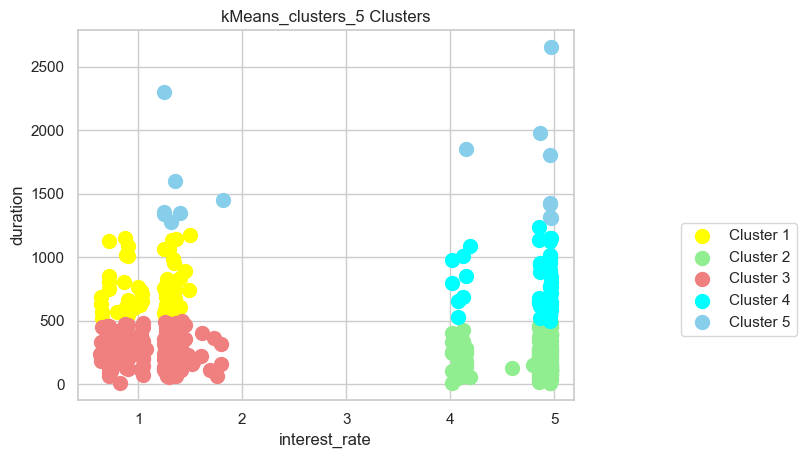

----------------------------------------
kMeans_clusters_7
----------------------------------------
 silhouette score : 0.5753250691907946

         interest_rate    credit    Gender  previous    duration     Churn
cluster                                                                   
0.0           3.100421  0.105263  0.421053  0.157895  366.105263  0.421053
1.0           2.904631  0.012739  0.286624  0.133758  403.076433  0.496815
2.0           2.811314  0.041420  0.230769  0.142012  394.337278  0.538462
3.0           3.006475  0.033898  0.322034  0.084746  351.542373  0.559322
4.0           3.125462  0.000000  0.307692  0.038462  361.192308  0.307692
5.0           3.450800  0.000000  0.200000  0.000000  504.600000  0.600000
6.0           2.825096  0.068493  0.246575  0.136986  366.945205  0.479452
--------------------------------------------------------------------------------


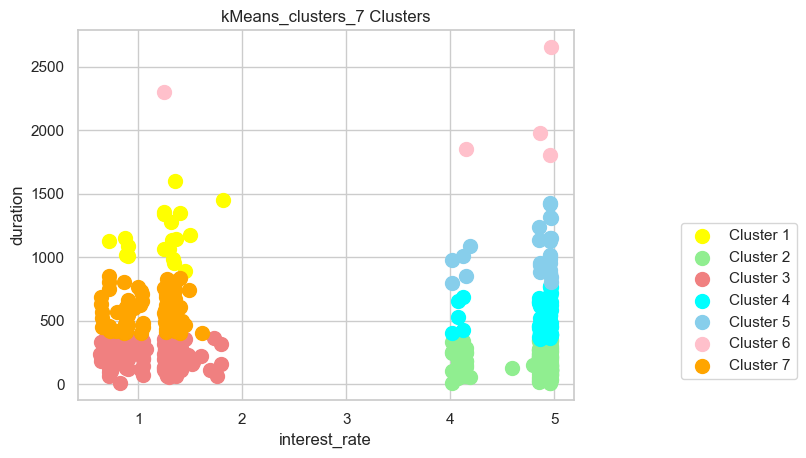

In [23]:
for model_name, model, ncluster in model_cluster:
    model.fit(sc_x2)
    model_labels =  model.labels_
    silhouette = silhouette_score(sc_x2, model_labels, random_state=1)
    df2= df.copy()
    df2['cluster'] = pd.Series(model_labels)
   
    print('--'*20)
    print(model_name)
    print('--'*20)
    print(f' silhouette score : {silhouette}')
    print()
    print( df2.iloc[:, 0:6].groupby(df2.cluster).mean())
    print('--'*40)
    color =['yellow', 'lightgreen', 'lightcoral', 'cyan', 'skyblue','pink', 'orange']
    for i in range(0, ncluster):
        plt.scatter(x2_train[model_labels == i, 0], x2_train[model_labels == i, 1 ], 
                    s=100, c=color[i], label ='Cluster '+str(i+1))
     
        plt.title(model_name +' Clusters')
    plt.xlabel('interest_rate')
    plt.ylabel('duration')
    plt.legend( bbox_to_anchor=(1.2,0.5))
    
    plt.show()

#   ▨ Modeling with 3 features : `interest_rate`,`duration`, `Churn`

For n_clusters = 3, the intertia is 535.2870606652542
For n_clusters = 4, the intertia is 341.99897529325335
For n_clusters = 5, the intertia is 227.76158050959037
For n_clusters = 6, the intertia is 176.6691790591495
For n_clusters = 7, the intertia is 144.51450419165573
For n_clusters = 8, the intertia is 117.73405232225687
For n_clusters = 9, the intertia is 91.12974068533914
For n_clusters = 10, the intertia is 77.91532496028883
For n_clusters = 11, the intertia is 67.38281236972449
For n_clusters = 12, the intertia is 58.810443399324676
For n_clusters = 13, the intertia is 51.91088164614595
For n_clusters = 14, the intertia is 48.086950615696765


Text(0.5, 1.0, 'Elbow Method')

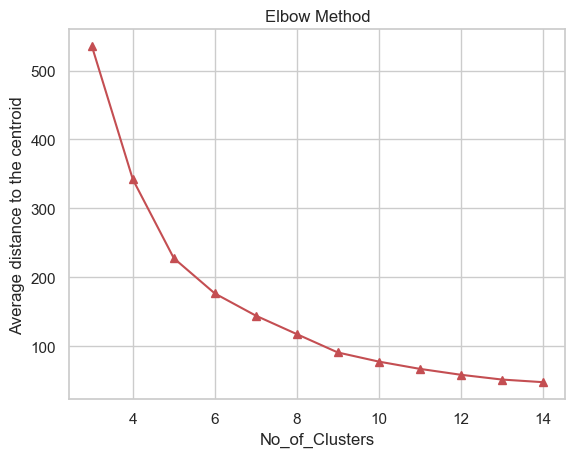

In [24]:
x3 = df.loc[:, ['interest_rate','duration', 'Churn',]].values
sc_x3 = sc.fit_transform(x3)

error3 = []  
k = list(range(3, 15))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(sc_x3)
    error3.append(kmeans.inertia_)
    print(f'For n_clusters = {i}, the intertia is {kmeans.inertia_}' )    
plt.plot(k, error3, 'r^-')
plt.xlabel("No_of_Clusters")
plt.ylabel("Average distance to the centroid")
plt.title('Elbow Method')

In [25]:
pd.DataFrame(sc_x3, columns =['interest_rate','duration', 'Churn'])

interest_rate  duration     Churn
0        -0.827129 -0.782880 -1.005865
1        -1.129090 -0.326688  0.994169
2         1.049610 -0.637596 -1.005865
3         0.656581  0.870452  0.994169
4         1.048545 -0.660841 -1.005865
..             ...       ...       ...
508      -0.827129 -0.530086 -1.005865
509      -1.079029  1.219134  0.994169
510      -1.069443 -0.280197 -1.005865
511      -1.070508  0.251542  0.994169
512       1.106594 -0.710238 -1.005865

[513 rows x 3 columns]

----------------------------------------
kMeans_clusters_5
----------------------------------------
 silhouette score : 0.655579576321065

         interest_rate    credit    Gender  previous    duration     Churn
cluster                                                                   
0.0           2.916305  0.011299  0.299435  0.129944  401.305085  0.497175
1.0           3.155857  0.057143  0.314286  0.085714  440.000000  0.485714
2.0           2.921125  0.023810  0.238095  0.148810  386.053571  0.523810
3.0           2.606053  0.106667  0.240000  0.120000  382.266667  0.506667
4.0           3.006283  0.037736  0.301887  0.075472  308.792453  0.471698
--------------------------------------------------------------------------------


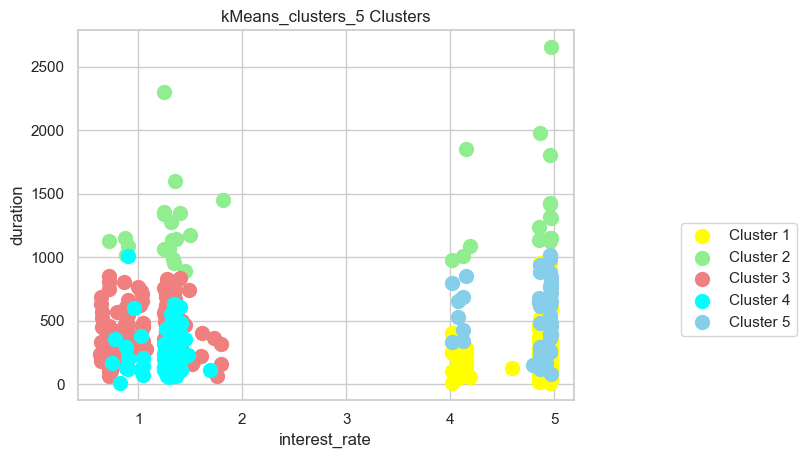

----------------------------------------
kMeans_clusters_7
----------------------------------------
 silhouette score : 0.6556484427282129

         interest_rate    credit    Gender  previous    duration     Churn
cluster                                                                   
0.0           2.959286  0.047619  0.309524  0.071429  317.785714  0.547619
1.0           3.087977  0.046512  0.302326  0.162791  350.930233  0.488372
2.0           2.925971  0.011494  0.293103  0.132184  406.189655  0.505747
3.0           3.702667  0.000000  0.166667  0.000000  588.666667  0.666667
4.0           2.575608  0.108108  0.229730  0.121622  386.121622  0.513514
5.0           2.880503  0.027972  0.244755  0.146853  389.608392  0.517483
6.0           3.125462  0.000000  0.307692  0.038462  361.192308  0.307692
--------------------------------------------------------------------------------


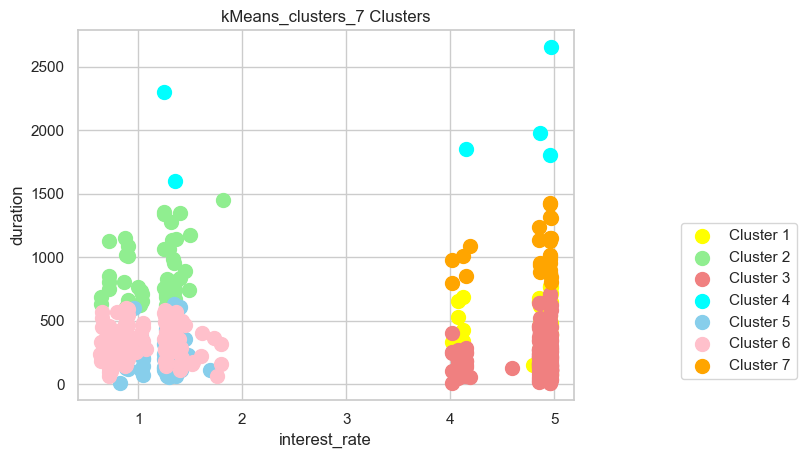

In [26]:
for model_name, model, ncluster in model_cluster:
    model.fit(sc_x3)
    model_labels =  model.labels_
    pred = model.predict(sc_x3)
    silhouette = silhouette_score(sc_x3, model_labels, random_state=1)
    df3 = df.copy()
    df3['cluster'] = pd.Series(model_labels)
    print('--'*20)
    print( model_name)
    print('--'*20)
#     print('Trained data', model_labels)
#     print('predicted data',pred)
    print(f' silhouette score : {silhouette}')
    print()
    print( df3.iloc[:, 0:6].groupby(df3.cluster).mean())
    print('--'*40)
    fig = px.scatter_3d(df3, x ='interest_rate', y= 'Churn', z='duration' , color ='interest_rate' )
    fig.show()
    color =['yellow', 'lightgreen', 'lightcoral', 'cyan', 'skyblue','pink', 'orange']
    for i in range(0, ncluster):
        plt.scatter(x3[model_labels == i, 0], x3[model_labels == i, 1 ], s=100, c=color[i], label ='Cluster '+str(i+1))
         
        plt.title(model_name +' Clusters')
    plt.xlabel('interest_rate')
    plt.ylabel('duration')
    plt.legend( bbox_to_anchor=(1.2,0.5))
    
    
    plt.show()


#   ▨ Modeling with 4 features : `interest_rate`,`duration`, `Churn` and `Gender`

In [27]:
x4 = df.loc[:, ['interest_rate','duration', 'Churn', 'Gender']].values
sc_x4 = sc.fit_transform(x4)
pd.DataFrame(sc_x4, columns =['interest_rate','duration', 'Churn','Gender'])

interest_rate  duration     Churn    Gender
0        -0.827129 -0.782880 -1.005865  1.640319
1        -1.129090 -0.326688  0.994169 -0.609637
2         1.049610 -0.637596 -1.005865  1.640319
3         0.656581  0.870452  0.994169 -0.609637
4         1.048545 -0.660841 -1.005865  1.640319
..             ...       ...       ...       ...
508      -0.827129 -0.530086 -1.005865  1.640319
509      -1.079029  1.219134  0.994169 -0.609637
510      -1.069443 -0.280197 -1.005865 -0.609637
511      -1.070508  0.251542  0.994169 -0.609637
512       1.106594 -0.710238 -1.005865 -0.609637

[513 rows x 4 columns]

In [28]:
for model_name, model, ncluster in model_cluster:
    model.fit(sc_x4)
    model_labels =  model.labels_
    silhouette = silhouette_score(sc_x4, model_labels, random_state=1)
    df4 = df.copy()
    df4['cluster'] = pd.Series(model_labels)
    print('--'*20)
    print(model_name)
    print('--'*20)
    print(f' silhouette score : {silhouette}')
    print()
    print( df4.iloc[:, 0:6].groupby(df4.cluster).mean())
    print('--'*40)

----------------------------------------
kMeans_clusters_5
----------------------------------------
 silhouette score : 0.5505974722438397

         interest_rate    credit    Gender  previous    duration     Churn
cluster                                                                   
0.0           2.913070  0.028169  0.232394  0.154930  381.985915  0.542254
1.0           2.725623  0.043210  0.277778  0.123457  420.851852  0.555556
2.0           2.991891  0.065217  0.391304  0.108696  424.500000  0.456522
3.0           3.009923  0.032967  0.252747  0.142857  351.780220  0.406593
4.0           3.066269  0.014925  0.283582  0.059701  333.805970  0.462687
--------------------------------------------------------------------------------
----------------------------------------
kMeans_clusters_7
----------------------------------------
 silhouette score : 0.5925088849802866

         interest_rate    credit    Gender  previous    duration     Churn
cluster                                

#   ▨ Modeling with all features

For n_clusters = 3, the intertia is 1759.219425163075
For n_clusters = 4, the intertia is 1312.5647507569627
For n_clusters = 5, the intertia is 1005.1254345057963
For n_clusters = 6, the intertia is 780.778024214083
For n_clusters = 7, the intertia is 653.5824962754772
For n_clusters = 8, the intertia is 573.2075443889329
For n_clusters = 9, the intertia is 491.86959403883264
For n_clusters = 10, the intertia is 413.93497789435935
For n_clusters = 11, the intertia is 364.9169104089628
For n_clusters = 12, the intertia is 328.30554004879815
For n_clusters = 13, the intertia is 293.87842334652925
For n_clusters = 14, the intertia is 266.94971985690347


Text(0.5, 1.0, 'Elbow Method')

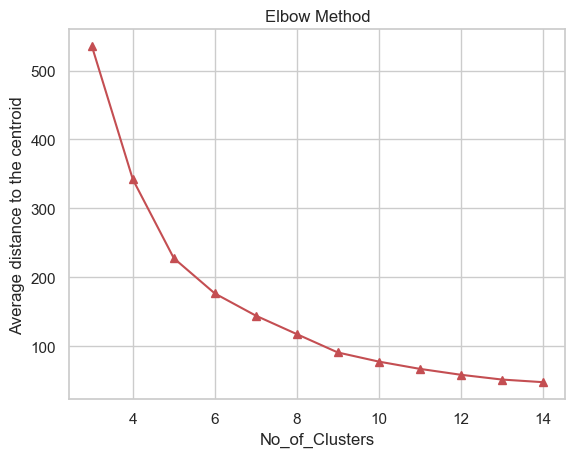

In [29]:
x_all = df.iloc[:,:]
sc_x = sc.fit_transform(x_all)

error = []  
k = list(range(3, 15))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(sc_x)
    error.append(kmeans.inertia_)
    print(f'For n_clusters = {i}, the intertia is {kmeans.inertia_}' )  
plt.plot(k, error3, 'r^-')
plt.xlabel("No_of_Clusters")
plt.ylabel("Average distance to the centroid")
plt.title('Elbow Method')

In [30]:
for model_name, model, ncluster in model_cluster:
    model.fit(sc_x)
    model_labels =  model.labels_
    silhouette = silhouette_score(sc_x, model_labels, random_state=1)
    df_all = df.copy()
    df_all['cluster'] = pd.Series(model_labels)
    print('--'*40)
    print(model_name)
    print('--'*40)
    print(f' silhouette score : {silhouette}')
    print()
    print( df_all.iloc[:, 0:6].groupby(df_all.cluster).mean())
    print('--'*40)


--------------------------------------------------------------------------------
kMeans_clusters_5
--------------------------------------------------------------------------------
 silhouette score : 0.4627904912095595

         interest_rate    credit    Gender  previous    duration     Churn
cluster                                                                   
0.0           2.735064  0.044586  0.286624  0.121019  423.242038  0.554140
1.0           2.995393  0.038251  0.262295  0.114754  376.896175  0.486339
2.0           2.660914  0.000000  0.258621  0.155172  401.448276  0.586207
3.0           3.069174  0.043478  0.260870  0.130435  341.445652  0.402174
4.0           3.217667  0.000000  0.333333  0.166667  344.777778  0.500000
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
kMeans_clusters_7
---------------------------------------------------------------------------

In [31]:
fig1 = px.scatter_3d(df_all, x ='Gender', y= 'credit', z='duration' , color ='Gender'  )
fig2 = px.scatter_3d(df_all, x ='Gender', y= 'interest_rate', z='duration' , color ='interest_rate'  )
fig3 = px.scatter_3d(df_all, x ='interest_rate', y= 'credit', z='duration' , color ='interest_rate'  )
fig1.show()
fig2.show()
fig3.show()

# ▨ Overall Evaluation (Silhouette Analysis)

The evaluation of a K-means clustering model is often performed using a metric called the silhouette distance. The silhouette distance metric yields values within the range of [-1, +1]. A higher silhouette distance value indicates a better quality model, with values approaching +1 suggesting that the clusters are well-separated and distinct.

In summary, the silhouette distance serves as a measure to assess the effectiveness of a K-means clustering model. A silhouette distance closer to +1 signifies that the clusters formed are distinct and well-defined, indicating a stronger and more reliable clustering solution.

In [32]:
features =['feature_2','feature_2', 'feature_3','feature_3', 'feature_4','feature_4','feature_all', 'feature_all']
data ={ 'features': features,
       'n_cluster (k)': [5,7,5,7,5,7,5,7],
       'silhouette_distance' :[0.63,0.57, 0.65, 0.65, 0.55, 0.59, 0.46,0.54],     
    
}
    
silhouette_df = pd.DataFrame(data, )
silhouette_df

features  n_cluster (k)  silhouette_distance
0    feature_2              5                 0.63
1    feature_2              7                 0.57
2    feature_3              5                 0.65
3    feature_3              7                 0.65
4    feature_4              5                 0.55
5    feature_4              7                 0.59
6  feature_all              5                 0.46
7  feature_all              7                 0.54

In [33]:
crosstab_result1 = pd.crosstab(silhouette_df['features'], silhouette_df['n_cluster (k)'], values=silhouette_df['silhouette_distance'], aggfunc='mean')
crosstab_result1

n_cluster (k)     5     7
features                 
feature_2      0.63  0.57
feature_3      0.65  0.65
feature_4      0.55  0.59
feature_all    0.46  0.54

Text(0, 0.5, 'silhouette_score')

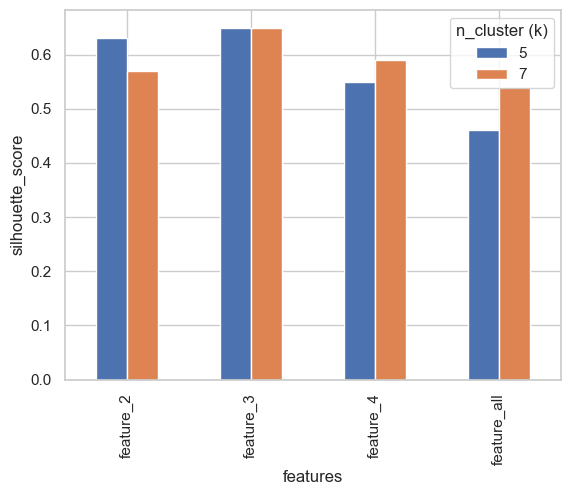

In [34]:
crosstab_result1.plot(kind ='bar')
plt.ylabel('silhouette_score')

In [35]:
crosstab_result2 = pd.crosstab(silhouette_df['n_cluster (k)'], silhouette_df['features'],  values=silhouette_df['silhouette_distance'], aggfunc='mean')
crosstab_result2

features       feature_2  feature_3  feature_4  feature_all
n_cluster (k)                                              
5                   0.63       0.65       0.55         0.46
7                   0.57       0.65       0.59         0.54

Text(0, 0.5, 'silhouette_score')

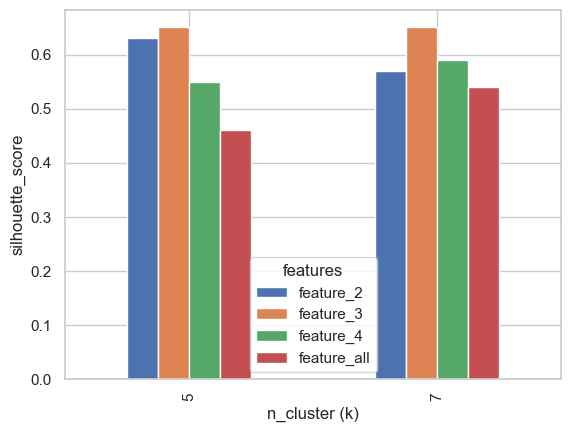

In [36]:
crosstab_result2.plot(kind ='bar')
plt.ylabel('silhouette_score')

# ▨ Conclusion

###  ▬ The model is efficient in clustering with features =3 and no of clusters =7
### ▬  Model build using feature =3, k=7 has obtained a silhouette_score  0.655

 Payal Mohanty, 13th August 2023